# <font color='purple'>03-HydroStaticEQ</font>

## 0. We start by importing the modules
* Numpy -- operations on arrays and matrixes (and pi)
* Matplotlib pyplot -- plotting library
* Astropy units -- defined quantities with units. We also import the CDS conversions

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
# This option enables plots to be inline, 
# as opposed to opening in a separate window.

from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. Solving the equation of hydrostatic equilibium with known density.

### a. In class: the constant density case 

For a density that is constant inside of the star, we found that 
$$\frac{P(r)}{P_o} = \left[ 1 - \left(\frac{r}{R_\star}\right)^2\right],$$
where $P_o$ is the pressure at the center ($r=0$)

We will add this curve to the graph of $P(r)/P_c$ versus $r/R_\star$ below.


### b. At home: the decreasing density case

Now let's consider a density that varies as
$$\rho = \rho_o\left(1-\frac{r}{R_\star}\right),$$ 
as we did for the previous notebook L02. 

follow the same procedure to find $\frac{P(r)}{P_o}$, and add it to the plot below.

> **TODO** <font color='red'>: follow the same procedure to find $\frac{P(r)}{P_o}$ for the decreasing density case. Write your solution below. This means starting from the HS differential equation, but you can use results from notebook L02. Transform your integral to a unitless-form before performing the integration. Use Latex formatting to render the math (or enter a clear photo of your work -- see notebook L02)</font>

<img src= "https://drive.google.com/uc?export=view&id=1uKZzS-FTMKlSJkZFX0FmJaws7HWpYheD" width="500">


> **TODO** <font color='red'>: Add this curve to the graph below, with a label in the legend.</font>

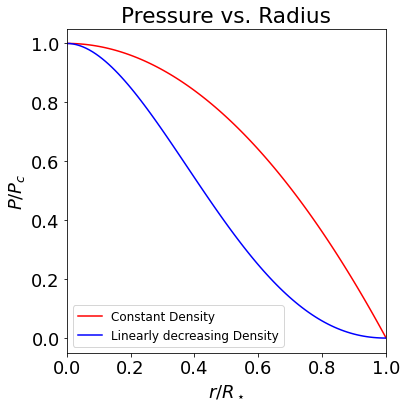

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
# The subplot routine creates a figure object (in the variable "fig"), which contains
# here a single plotting window called "axes" (in the variable "ax")
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.family': 'Times New Roman'})
# Set the font and font size for the whole figure.

ax.set_xlabel(r'$r/R_\star$') # the "r" is to say there is latex formatted strings.
ax.set_xlim(0,1)

ax.set_ylabel(r'$P/P_c$') 

#-------------------------------------------------------
# In class

# define an array of r / Rs, from 0 to 1, with 100 elements
r_rs=np.linspace(0,1,100)

# For constant density

P_P0=1-(r_rs)**2

ax.plot(r_rs,P_P0,label='Constant Density',c="red")


#-------------------------------------------------------
# For linearly decreasing density (portfolio)
# At home
#P_P01=(r_rs-1)**2
#P_P02=-((-1+r_rs)**4)*(-1+(4*(r_rs))-(10*(r_rs)**2)-(20*(r_rs)**3)+(21*(r_rs)**4))
P_P03=-(9*(r_rs**4)-28*(r_rs**3)+24*(r_rs**2)-5)
P_P04=1-(1/5)*(r_rs**2)*((24-28*(r_rs)+(9)*(r_rs)**2))
ax.plot(r_rs,P_P04,label='Linearly decreasing Density',c='blue')


#-------------------------------------------------------
ax.legend(loc=0, fontsize=12)
ax.set_title("Pressure vs. Radius")
plt.tight_layout()
# arrange the plot nicely

> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

**ANSWER**: From this graph, one can see that a linearly decreasing density causes the scaled pressure to drop more rapidly than the case with a constant density. This makes sense because pressure has units of $\frac{[Force]}{[Area]}$. So if the density is decreasing, the force being applied to an area is also decreasing. This results in a more rapid drop in pressure relative to a constant density condition.

## 2. Now we would like to calculate the numerical value of the central pressure for a star of $1M_\odot$ and $1R_\odot$.

To give an idea, the values of density and pressure at the center of the Sun from sophisticated models are 165 g/cm$^3$ and $2.5\times10^{17} \mathrm{dyn / cm}^2$, respectively.

### a. In class: the constant density case

We know that
$$M_\star = \frac{4\pi R_\star^3}{3} \rho_o.$$
Therefore the density is
$$\rho_o = M_\star \frac{3}{4\pi R_\star^3}.$$

The central pressure is 
$$\frac{1}{2} \rho_o g_\star R_\star,$$

where the surface acceleration $g_\star = GM_\star / R_\star^2$.

In [3]:
############
# In class
############

# Let's start with a demo on how to use the unit capabilities of astropy

rho=1*u.M_sun * 3 / (4*np.pi*(u.R_sun**3))

print('In cgs units, the mean density of the sun is {}'.format(rho.cgs))
#print(rho.decompose())
#print(rho.to(u.g/u.cm**3))

gs = const.G * u.M_sun / u.R_sun**2
P0=rho*gs*u.R_sun/2
print('The central pressure for a constant density is {:0.3g}'.format(P0.to(u.dyn/u.cm**2)))

In cgs units, the mean density of the sun is 1.4097798243075257 g / cm3
The central pressure for a constant density is 1.34e+15 dyn / cm2


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

**ANSWER**: Even though the Sun is a massive, hot star made predominately out of hydrogen and helium, its mean density is still of order unity with water $ρ_w=1.00\frac{g}{cm^3}$. In fact, most objects in the universe have densities comparable to that of water. However, the central pressure is about two orders of magnitude lower than the accepted value of $2.5*10^{17} dyn/cm^2$. This could due to the fact that a constant density prevents the pressure from decreasing as quickly therefore keeping the central pressure lower than it should be.

### b. At home: the linearly decreasing density case

> **TODO**: <font color='red'>Now, you will derive expressions for the central density and central pressure (following the procedure above) for the case where we take the density to be $\rho = \rho_c\left(1-\frac{r}{R_\star}\right)$. Write your solution below in latex to render the math (or upload a clear photo of your work on paper). You can refer to results (scaled equations) from your previous notebooks.</font>



> **TODO**: <font color='red'>In the code cell below, use the astropy constant and unit packages to calculate the numerical values of the central density and central pressure for the decreasing density case. Make sure that the units are in the cgs pressure units, and that your 'print' statements include a label in front of the value.</font>

<img src= "https://drive.google.com/uc?export=view&id=1AEnTKdmz7nH3qwyvbn08anXQuF3AyzcO" width="500">

In [11]:
#################
# At home
#################
rho1=(3*u.M_sun) / (u.R_sun**3*np.pi)
print('In cgs units, the central density for the decreasing density case is {}'.format(rho1.cgs) )
#P01=((rho1*u.R_sun*gs)/2)*(-1+(u.R_sun/u.R_sun))**2
P02=((5*rho1*u.R_sun*gs)/12)
print('In pressure SI units, the pressure for a decreasing density case is {:0.3g}'.format(P02.to(u.dyn/u.cm**2)))


In cgs units, the central density for the decreasing density case is 5.639119297230103 g / cm3
In pressure SI units, the pressure for a decreasing density case is 4.48e+15 dyn / cm2


> **TODO**: <font color='red'>Please write a small paragraph with an interpretation of the result obtained:</font>

**ANSWER**: These results (for the linearly decreasing density profile) show that the central density and pressure are of order unity with the values obtained for the constant density profile case. However, these values of pressure and density are still about 2 orders of magnitude off from the accepted values for the Sun found through sophisticated models. This discrepency between my values and the accepted values suggests that a linearly decreasing density profile is still not a good approximation for the Sun.

## 3. Reading assignement: "what can we measure about stars" -- part 2

In this graduate course, we are making an advanced physical and mathematical model of star. 

But it is still good to learn and/or remind ourselves about which physical characteristics of stars we can actually measure. You might have covered some of this in some details in previous physics or astro courses (at UD PHYS 133, 144, 333, or 469) -- but it is still a good idea to have a quick look at the suggested reading below before crafting your paragraph. 

One other thing that can be measured is the **distance** to a star.

> **TODO**: <font color='red'>Have a look at section 19.2 "Celestial Distances > Surveying the Stars" of the Open Stack Astronomy online [textbook](https://openstax.org/books/astronomy/pages/5-2-the-electromagnetic-spectrum), and write a short conceptual paragraph about how astronomer can determine the distance to (nearby) stars. </font>
You might also find is interesting to have a quick look at the GAIA space mission: https://sci.esa.int/web/gaia/-/28820-summary

**ANSWER**: One way to calculate distances to a star is through the parallax method. Essentially, it uses geometry to calculate physical distances by creating a triangle between the Earth when it is on opposite sides of the Sun throughout the year and the object in question. One could then resolve the triangle to find the parallax and therefore, the distance. Parallax is defined as: $$D=1/p$$ where D is the distance and p is the parallax. 